## Best viewed in [Jupyter Notebook viewer...](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/analysis/SBH_time_expressions.ipynb)
All references are in the works cited portion of the [readme](../readme.md).
<hr>

# Time Expressions in Genesis—Kings ("SBH")

In this notebook I aim to provide a simple overview of time expressions in the selected corpus of Genesis—Kings, the so-called Standard Biblical Hebrew texts (1). The ETCBC Hebrew database has a feature of `function` stored on phrases in the corpus. The primary function of interest here is `Time`. Thus, we begin with a basic exploratory overview of the ETCBC `Time` phrases, looking specifically at their identity and distribution.

The methodology of this analysis is bottom-up and data driven. By "bottom-up" in this context, it is meant that time phrases are progressively described beginning with phrase-internal tendencies and moving to phrase external tendencies. For phrase external tendencies, clause-internal associations are analyzed, including predicate lexeme attractions and word orderings.

*(1) The term 'Standard Biblical Hebrew' and the decision to limit the corpus is done only to give a firm starting point from which to analyze BH time phrases in the rest of the Hebrew Bible. It is thus not a stance on the ongoing debate about diachronic methods in Biblical Hebrew linguistics.*

In [1]:
# ETCBC's BHSA data
from tf.app import use

# stats & data-containers
import collections, random
import pandas as pd
import numpy as np
import scipy.stats as stats

# data visualizations
import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid')
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# load BHSA and heads data
A = use('bhsa', mod='etcbc/heads/tf', hoist=globals())

Using bhsa commit 9374f7a8d075a94bc6b7e69e08a7ca86e725215f
  in /Users/cody/text-fabric-data/__apps__/bhsa
Using etcbc/bhsa/tf - c r1.5 in /Users/cody/text-fabric-data
Using etcbc/phono/tf - c r1.2 in /Users/cody/text-fabric-data
Using etcbc/parallels/tf - c r1.2 in /Users/cody/text-fabric-data
Using etcbc/heads/tf - c rv1.02 in /Users/cody/text-fabric-data


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="provenance of BHSA = Biblia Hebraica Stuttgartensia Amstelodamensis">BHSA</a> <a target="_blank" href="https://annotation.github.io/text-fabric/Writing/Hebrew" title="('Hebrew characters and transcriptions',)">Character table</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="BHSA feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/annotation/app-bhsa" title="bhsa API documentation">bhsa API</a> <a target="_blank" href="https://annotation.github.io/text-fabric/Api/Fabric/" title="text-fabric-api">Text-Fabric API 7.3.4</a> <a target="_blank" href="https://annotation.github.io/text-fabric/Use/Search/" title="Search Templates Introduction and Reference">Search Reference</a>

In [38]:
'''
Here are a set of counting and plotting functions
for easy searching and visualizing.
'''

def count_results(results, index, feature):
    '''
    Counts features of a TF search result list.
    Returns a counter dict object and a count datafame.
    index = n of result; feature = feature string to call on n
    '''
    counts = collections.Counter(Fs(feature).v(res[index]) for res in results)
    count_df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
    return (counts, count_df.sort_values(ascending=False, by='count'))

def barplot_counts(count_dict, title='', reverse_labels=False, size=(8, 6)):
    '''
    Makes simple barplot from collections.Counter type objects.
    '''
    count_df = pd.DataFrame.from_dict(count_dict, orient='index', columns=['count']).sort_values(ascending=False, by='count')
    n_bars = list(range(0, count_df.shape[0]))
    x_labels = [''.join(reversed(prep)) for prep in count_df.index] if reverse_labels else count_df.index
    plt.figure(figsize=size)
    sns.barplot(n_bars, count_df['count'], palette='muted')
    plt.xticks(n_bars, x_labels, size=18)
    plt.yticks(size=18)
    plt.title(title, size=18)
    plt.ylabel('count', size=18)
    plt.show()
    return count_df
    
def reverse_hb(hb_text):
    return ''.join(reversed(hb_text))

def show_subphrases(phrase, direction=L.d):
    '''
    A simple function to print subphrases
    and their relations to each other.
    '''
    for sp in direction(phrase, 'subphrase'):
        
        mother = E.mother.f(sp)[0] if E.mother.f(sp) else ''
        mother_text = T.text(mother)
        
        print('-'*7 + str(sp) + '-'*16)
        print()
        print(f'{T.text(sp)} -{F.rela.v(sp)}-> {mother_text}')
        print(f'nodes:  {sp} -{F.rela.v(sp)}-> {mother}')
        print(f'slots:  {L.d(sp, "word")} -{F.rela.v(sp)}-> {L.d(mother or 0, "word")}')
        print('-'*30)

In [4]:
# prepare the corpus

corpus = [book for book in F.otype.s('book') if book < T.nodeFromSection(('Isaiah',))]
print('Corpus:\n')
print('\n'.join(T.sectionFromNode(book)[0] for book in corpus))

Corpus:

Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Joshua
Judges
1_Samuel
2_Samuel
1_Kings
2_Kings


In [5]:
sets={'corpus':corpus} # make set for searching

## Introducing the Time Phrase

The `Time` feature is stored on phrases. What phrase types occur with these phrases, and in what quantity?

Number of time phrases in the corpus:
  0.29s 2180 results


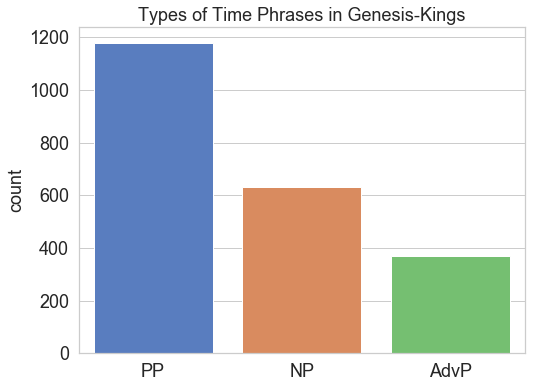


Phrase types and their frequency:


,count
PP,1180
NP,632
AdvP,368


In [6]:
find_time = '''
corpus
    phrase function=Time 
'''

# run the search, count features, and print/plot them
print('Number of time phrases in the corpus:')
times = A.search(find_time, sets=sets)
count_types = count_results(times, 1, 'typ')
count_types = barplot_counts(count_types[0], 'Types of Time Phrases in Genesis-Kings')
print('\nPhrase types and their frequency:')
count_types

## Analysis of PP Time Phrase Components

The prepositional phrase is by far the most common in the corpus. We should thus have a look at the kinds of prepositions involved and their distributions.

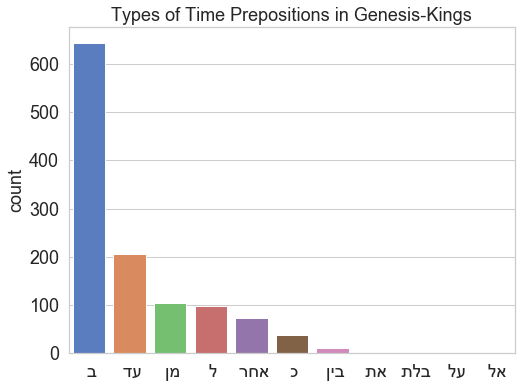



Prepositions and their frequency:



,count
ב,644
עד,205
מן,105
ל,99
אחר,74
כ,38
בין,10
את,2
בלת,1
על,1


In [7]:
'''
Count and plot the prepositions. For x-labels
the letter order has to be reversed 
in order to display properly in the plot
'''

prep_phrases = [res[1] for res in times if F.typ.v(res[1]) == 'PP']
prep_count_dict = collections.Counter(T.text(E.head.t(pp)[0], fmt='lex-orig-plain') for pp in prep_phrases)
prep_counts = pd.DataFrame.from_dict(prep_count_dict, orient='index', columns=['count'])
prep_counts = prep_counts.sort_values(ascending=False, by='count')

barplot_counts(prep_count_dict, 'Types of Time Prepositions in Genesis-Kings', reverse_labels=True)
print('\n\nPrepositions and their frequency:\n')
prep_counts

### Preposition / Prepositional Object Attraction in Time Adverbials

Haspelmath describes the way in which certain prepositions paradigmatically combine with certain noun lemmas (1997: 102-107). For instance, in English there are different collocation preferences for 'on', as in "on Tuesday," and 'at', as in "at five o'clock." In this case 'on' prefers nouns referring to time spans whereas 'at' refers to points in time. Both prepositions illustrate the "simultaneous" function, which places a situation on or in a particular time reference.

Presumably Hebrew time adverbials would likewise exhibit attractional preferences between their prepositions and prepositional objects. We can measure these preferences by applying a measure of association, which tells how dependent two categorical variables are upon each other. First, one counts how many times each preposition occurs with any given noun. Those counts are then compared against all other counts and transformed into a number that reflects the significance of the relation. We can then display and plot the most attracted nouns to any given preposition.

Before we count the prepositions and their co-occurring nouns within time adverbials, we will look more closely at lowly-attested prepositional phrases. We see in the table above the prepositions בלת (usually "not"). Other prepositions with neglible counts include על, אל, and את. We retrieve those cases and look at them below.

In [8]:
low_attest_search = A.search('''

corpus
    phrase function=Time typ=PP
        <head- word lex=BLT/|>L|<L|>T
''', sets=sets)

A.show(low_attest_search, condenseType='clause')


  0.75s 6 results




**book** *1*





**book** *2*





**book** *3*





**book** *4*





**book** *5*





**book** *6*



Note that for each result the "clause" can be clicked to pull up the full context.

#### בלת

This is an interesting case of what Waltke-O'Connor (WOC) call an "item adverb" (§39.3.1d), that is, the preposition בלת here modifies less the verbal argument (which already has לא) and more the object (the "item") of the preposition היום. Waltke-O'Connor list Hos 1:6 as an example, where the phrase לא רחמה appears.

### את

It is interesting that all uses of את with a time indicator occur alongside a niphal or hithpael. Typically את will mark the subject with these stems (WOC §10.3.2b). In Ex 13:7 מצות is the patient, so what role does את שבעת הימים play?

### אל and על

These two instances show something very interesting happening. The appearance of the verb בוא, in both cases, appears to have triggered the appearance of these prepositions. אל and על, as can be seen in the query below, occur much more frequently within locative phrases. And locative phrases are likely to co-occur with a verb such as בוא much more often. The result in 2 Sam 23:13 is especially fascinating, since it seems to juxtapose a time reference, a person reference, and a location reference. It is possible that in these instances the motion verb and preposition portray the subject as moving into or towards a point in time. This would be an example of what Haspelmath calls (via Clark 1973:50) the "moving-ego" model of time:

> It has often been observed that there are two ways in which time can be conceptualized in terms of movement: Either time is stationary, and the observer in the world moves through it, or the observer in the world is stationary and time moves past him or her. (1997: 59)

Both models are attested in language, though moving-time seems to be the most common (Haspelmath 1997: 60). Examples in English of the moving-ego model show up in "As we go through the years..." or "We're approaching the end of the year..." Even in these two examples, taken from Haspelmath, we can see the movement verb playing an important role. It is, thus, a reasonable question as to whether these constructions in the Hebrew Bible might convey a moving-ego sense of time.

#### Delineating a Test Set

We will set aside these four prepositions due to their rare usage and test the remaining seven prepositions for associated nouns. Below is a search template that finds results for the seven prepositions and their nouns. We add some important requirements, for instance that the object of the preposition must not be another preposition. This ensures that 

In [9]:
prep_obj_search = '''

corpus
    p1:phrase function=Time typ=PP
        <head- word lex=B|<D|MN|L|>XR/|K|BJN/
        < noun:word

p1 <nhead- noun
'''

prep_obj_search = A.search(prep_obj_search, sets=sets)

  1.32s 1199 results


24 prepositional phrases are filtered out either because they have another preposition as their object or they have a quantifier/potential preposition as their object.

<hr>

### Excursus: What kinds of words tend to serve as objects in prepositional time phrases?

We will make a count of the parts of speech that occur in the prepositional object position of PP time phrases.

  0.88s 1189 results


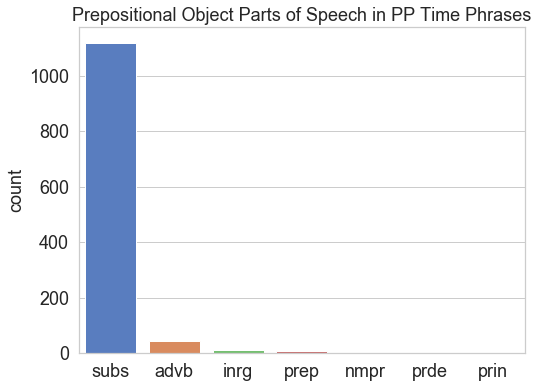

,count
subs,1120
advb,44
inrg,12
prep,9
nmpr,2
prde,1
prin,1


In [10]:
pp_obj_time = '''

corpus
    phrase function=Time typ=PP
        <head- word
        <obj_prep- word
'''

pp_obj_time = A.search(pp_obj_time, sets=sets)
pp_obj_time_ct = collections.Counter(F.pdp.v(result[3]) for result in pp_obj_time)
pp_obj_time_ct = barplot_counts(pp_obj_time_ct, title='Prepositional Object Parts of Speech in PP Time Phrases')
pp_obj_time_ct

It is expected to have substantives and adverbs as the most common parts of speech. What kinds of interrogative terms carry a temporal sense?

In [11]:
inrg_ct = collections.Counter(F.lex_utf8.v(result[3]) for result in pp_obj_time 
                                  if F.pdp.v(result[3]) == 'inrg')
inrg_ct.most_common()

[('מתי', 8), ('אן', 4)]

מתי is a lexeme indicating "when" in an interrogative, as is אן. This makes sense. 

The next most common is the preposition, with 9 occurrences. Which prepositions occur in this position?

In [12]:
A.show(list(res for res in pp_obj_time if F.pdp.v(res[3]) == 'prep'),  condenseType='clause')



**book** *1*





**book** *2*





**book** *3*





**book** *4*





**book** *5*





**book** *6*





**book** *7*





**book** *8*





**book** *9*



These are exclusively cases where the preposition governs מן "from." All but one of these cases involves either ל or עד. The lexeme יום serves as the object in all cases except for clause 3 (Lev 23:16) where the nominal object is מחרת, a common collocate, as shown in the subsequent section. The use of מן with יום is of interest in light of the results that follow below, which suggests that there is a slight repulsion between יום and מן, despite this collocation occurring a few times. Do the other uses of מן with יום contain any parallels or clues as to why ל and עד is combined here?

In [13]:
A.show(A.search('''

corpus
    phrase function=Time typ=PP
        <head- word lex=MN
        <obj_prep- word lex=JWM/
''', sets=sets), condenseType='clause')

  1.13s 28 results




**book** *1*





**book** *2*





**book** *3*





**book** *4*





**book** *5*





**book** *6*





**book** *7*





**book** *8*





**book** *9*





**book** *10*





**book** *11*





**book** *12*





**book** *13*





**book** *14*





**book** *15*





**book** *16*





**book** *17*





**book** *18*





**book** *19*





**book** *20*





**book** *21*





**book** *22*





**book** *23*





**book** *24*





**book** *25*





**book** *26*





**book** *27*





**book** *28*



Many of these examples consist of מן followed by ל, עד, or הלאה "onward". 

<hr>

#### Making the Counts

In [14]:
prep_noun_counts = collections.defaultdict(lambda: collections.Counter())

for result in prep_obj_search:
    prep = F.lex_utf8.v(result[2])
    prep_obj = F.lex_utf8.v(result[3])
    prep_noun_counts[prep][prep_obj] += 1
    
prep_noun_counts = pd.DataFrame(prep_noun_counts).fillna(0)

prep_noun_counts.shape

(73, 7)

In [15]:
prep_noun_counts.head() # first five rows

,ב,ל,מן,אחר,עד,כ,בין
אבימלך,0.0,0.0,0.0,1.0,0.0,0.0,0.0
אור,0.0,0.0,0.0,0.0,2.0,0.0,0.0
אז,0.0,0.0,2.0,0.0,0.0,0.0,0.0
אחד,7.0,0.0,0.0,0.0,0.0,0.0,0.0
אחרון,2.0,1.0,0.0,0.0,0.0,0.0,0.0


Below we display the number of cooccurrences for each preposition as well as the top counts.

In [16]:
for prep in prep_noun_counts:
    positive = pd.DataFrame(prep_noun_counts[prep][prep_noun_counts[prep] > 0].sort_values(ascending=False))
    print(f'\n{prep} has {positive.shape[0]} colexemes with {positive.sum()[0]} total occurrences')
    print('\ntop twenty colexemes:')
    display(positive.head(20))
    print('-'*20)


ב has 36 colexemes with 661.0 total occurrences

top twenty colexemes:


,ב
יום,321.0
שׁנה,86.0
בקר,65.0
עת,45.0
לילה,25.0
חדשׁ,23.0
ערב,14.0
עצם,12.0
ראשׁון,9.0
אחד,7.0


--------------------

ל has 22 colexemes with 102.0 total occurrences

top twenty colexemes:


,ל
עולם,21.0
יום,17.0
פנה,16.0
מועד,8.0
עת,7.0
דור,5.0
מחר,4.0
תשׁובה,3.0
חדשׁ,3.0
מות,3.0


--------------------

מן has 23 colexemes with 114.0 total occurrences

top twenty colexemes:


,מן
יום,39.0
מחרת,22.0
שׁנה,11.0
תמול,8.0
בקר,5.0
נעורים,5.0
ערב,3.0
כן,2.0
דור,2.0
חדשׁ,2.0


--------------------

אחר has 10 colexemes with 62.0 total occurrences

top twenty colexemes:


,אחר
כן,33.0
מות,11.0
דבר,9.0
מבול,3.0
שׁלוחים,1.0
מגפה,1.0
יובל,1.0
יהושׁע,1.0
טהרה,1.0
אבימלך,1.0


--------------------

עד has 20 colexemes with 212.0 total occurrences

top twenty colexemes:


,עד
יום,79.0
ערב,41.0
עולם,29.0
בקר,18.0
מתי,7.0
שׁנה,6.0
מות,5.0
עתה,4.0
אן,4.0
הנה,3.0


--------------------

כ has 8 colexemes with 38.0 total occurrences

top twenty colexemes:


,כ
יום,16.0
עת,13.0
תמול,3.0
אתמול,2.0
רגע,1.0
מות,1.0
חצות,1.0
חדשׁ,1.0


--------------------

בין has 1 colexemes with 10.0 total occurrences

top twenty colexemes:


,בין
ערב,10.0


--------------------


Note the יום "day" occurs with all prepositions except for בין "between." Nevertheless, due to this word's very high cooccurrence with ב these uses are considered statistically insignificant and falling below their expected values (see the next section). יום appears "repelled" by all other prepositions (ל, מן, אחר) with the exception of עד and כ.

#### Measure Associational Strength of the Counts

Because there are many zero counts in the table, a Fisher's Exact Test is the most appropriate (see Levshina, *How to do Linguistics with R*, 214). We also apply a log-transformation to convert p-values into negative/positive associations.

In [19]:
def apply_fishers(df, logtransform=True):
    '''
    This function simply applies Fisher's
    exact test to every value in a co-occurrence
    matrix. It returns a transformed matrix.
    Includes default option to log-transform
    the results based on log10 and expected
    frequency condition.
    '''
    # pre-process data for contingency tables
    target_obs = df.apply(lambda col: col.sum(), axis=0, result_type='broadcast') # all columns filled with col sums
    colex_obs = df.apply(lambda row: row.sum(), axis=1, result_type='broadcast') # all rows filled with row sums
    total_obs = df.sum().sum() # total observations
    b_matrix = target_obs.sub(df)
    c_matrix = colex_obs.sub(df)
    d_matrix = pd.DataFrame.copy(df, deep=True)
    d_matrix[:] = total_obs # fill all cells with same number: the sum of all values in df
    d_matrix = d_matrix.sub(df+b_matrix+c_matrix)
    expected = (df+b_matrix) * (df+c_matrix) / (df+b_matrix+c_matrix+d_matrix)
    
    dffishers = collections.defaultdict(lambda: collections.defaultdict())
    for target in df.columns:
        for colex in df.index: 
            # values for contingency table and expected freq.
            a = df[target][colex]
            b = b_matrix[target][colex]
            c = c_matrix[target][colex]
            d = df.sum().sum() - (a+b+c)
            
            # Fisher's
            contingency = np.matrix([[a, b], [c, d]])
            oddsratio, p_value = stats.fisher_exact(contingency)
            
            if not logtransform:
                dffishers[target][colex] = p_value
            else:
                expected_freq = expected[target][colex]
                if a < expected_freq:
                    strength = np.log10(p_value)
                else:
                    strength = -np.log10(p_value)
                dffishers[target][colex] = strength
                
    return pd.DataFrame(dffishers)
            
pp_noun_associations = apply_fishers(prep_noun_counts)

pp_noun_associations.head()

,ב,ל,מן,אחר,עד,כ,בין
אבימלך,-0.348037,0.000000,0.000000,1.286427,0.000000,0.0,0.0
אור,-0.696519,0.000000,0.000000,0.000000,1.506658,0.0,0.0
אז,-0.696519,0.000000,2.047293,0.000000,0.000000,0.0,0.0
אחד,1.724914,0.000000,0.000000,0.000000,-0.211846,0.0,0.0
אחרון,-0.000000,0.630236,0.000000,0.000000,0.000000,0.0,0.0


#### Display and Plot the Top Attracted Nouns per Preposition

Note that the displayed p-value is the log10 of 0.5, which is about 1.3

In [20]:
-np.log10(0.05)

1.3010299956639813

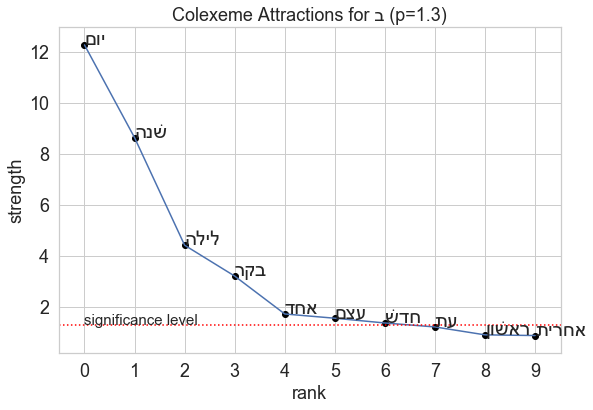

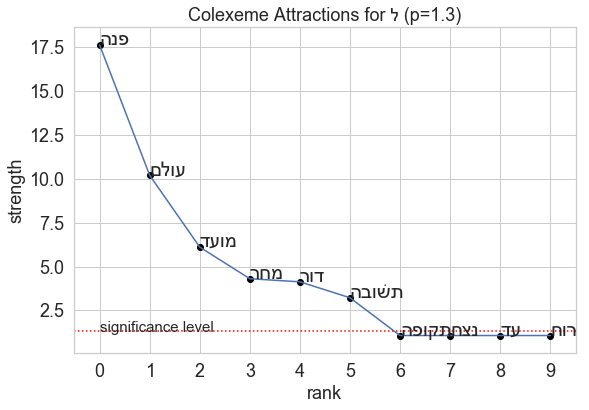

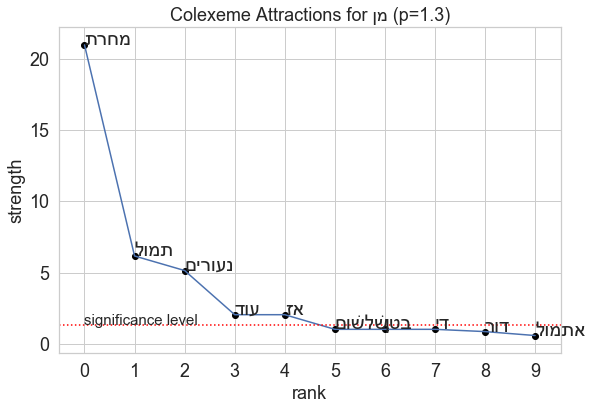

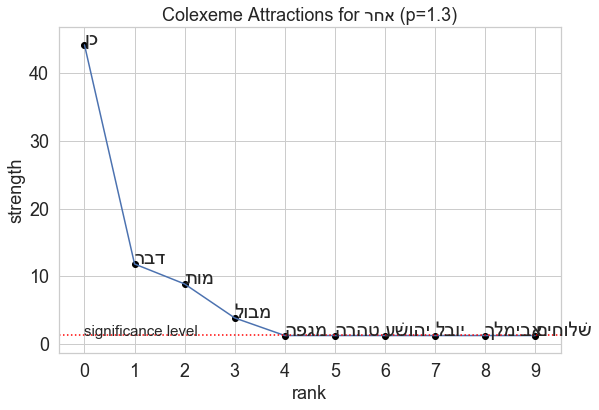

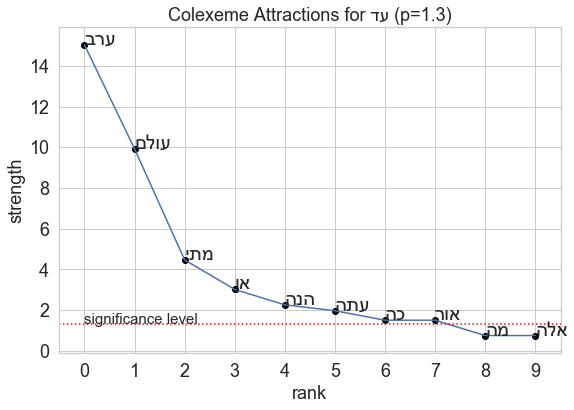

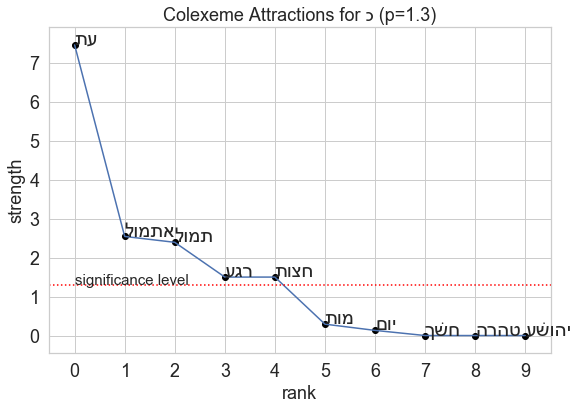

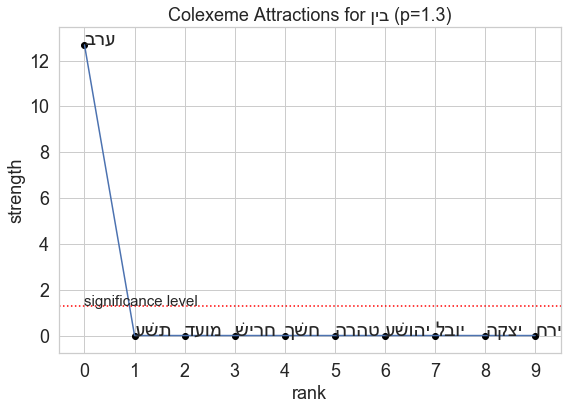

In [21]:
for prep in pp_noun_associations.columns:
    
    top_colex = pp_noun_associations[prep].sort_values(ascending=False).head(10)
    y = top_colex.values
    x = list(range(0, len(y)))
    labels = list(reverse_hb(colex) for colex in top_colex.index)

    plt.figure(figsize=(9, 6))
    plt.plot(x, y)
    plt.axhline(1.3, color='red', linestyle=':')
    plt.scatter(x, y, color='black')
    plt.title(f'Colexeme Attractions for {reverse_hb(prep)} (p=1.3)', size=18)
    plt.yticks(size=18)
    plt.xticks(range(0, len(top_colex)), size=18)
    plt.xlabel('rank', size=18)
    plt.ylabel('strength', size=18)
    for x, y, label in zip(x, y, labels):
        plt.annotate(label, [x, y], size=20)
    plt.annotate('significance level', (0, 1.3), size=15)

**Notes**

The high levels of attraction between ל and פנה mirror the combination of ל and מן noted above in the excursus on compound prepositional time phrases.

## Attraction Plots

The plots above give a good idea of the top attracted terms, but they are not comprehensive, and they do not visualize the concept of attraction. For that we will implement a swarm plot with a heatmap. This is intended to illustrate attractional strength on a linear gradient. In other words, words are visualized on a sliding scale which highlights attraction or repulsion between two given constructions.

Heatmap:<br>
upper_level_grey = `1.3`, i.e. the log-transformed line of statistical significance.<br>
lower_level_grey = `-1.3`, i.e. inverse of statistical signficance, anything below is repelled<br>
starting_red  = `1.4`<br>
starting_blue = `-1.4`<br>
max_red = `max(dataset) if > 1.3`<br>
max_blue = `min(dataset) if < -1.3` 



In [22]:
def assign_hue(iterable_data, p=1.3, maxvalue=10, minvalue=-10):
    '''
    Function to assign heat-map hues based 
    on a p-value midpoint and max/min attraction
    values.
    
    The following rules are used for making
    the colors:
    p = p-value, i.e. significance level
    upper grey = p
    lower grey = -p
    starting red = p+0.1
    starting blue = -p-0.4
    max_red = max(dataset) if > p = hotmax
    max_blue = min(dataset) if < p = coldmax
    
    --output--
    1. a dataframe with values mapped to a unique color code
    2. a list of rgba colors that are aligned with the
       indices of the data
    '''
    
    maxvalue = int(maxvalue) # for max red
    minvalue = int(minvalue) # for max blue
        
    # assign ranges based on p values and red/blue/grey
    red_range = len(range(int(p), maxvalue+1))
    blue_range = len(range(int(p), abs(minvalue-1)))
        
    blues = sns.light_palette('blue', blue_range)
    reds = sns.light_palette('red', red_range)
    grey = sns.color_palette('Greys')[0]
    
    # assign colors based on p-value
    data = list()
    colorCount = collections.Counter()
    rgbs = list()
    for point in iterable_data:
        if point > p:
            rgb = reds[int(point)-1]
            color = 'red'
        elif point < -p:
            rgb = blues[abs(int(point))-1] 
            color = 'blue'
        else:
            rgb = grey
            color = 'grey'
            
        color_count = colorCount.get(color, 0)
        colorCount[color] += 1
        data.append([point, f'{color}{color_count}'])
        rgbs.append(rgb)
        
    data = pd.DataFrame(data, columns=('value', 'color'))
        
    return data, rgbs

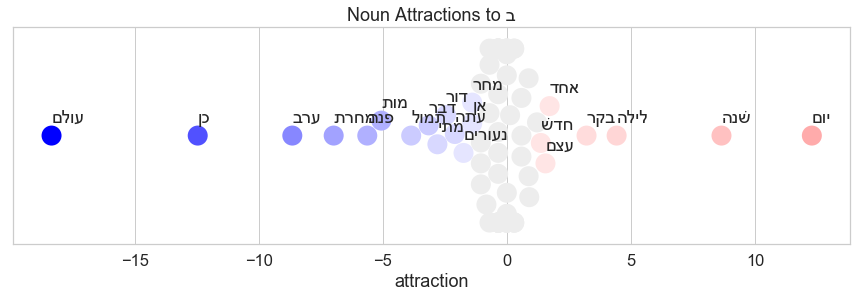

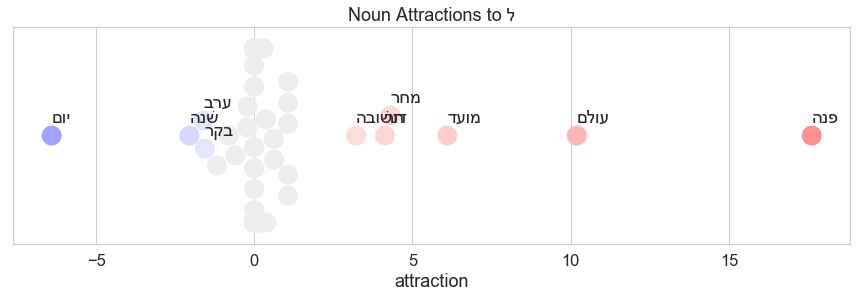

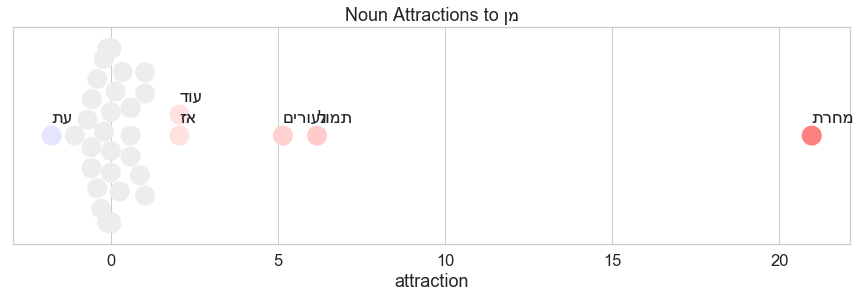

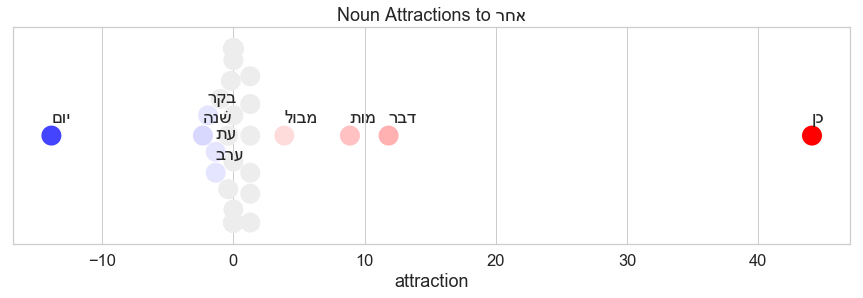

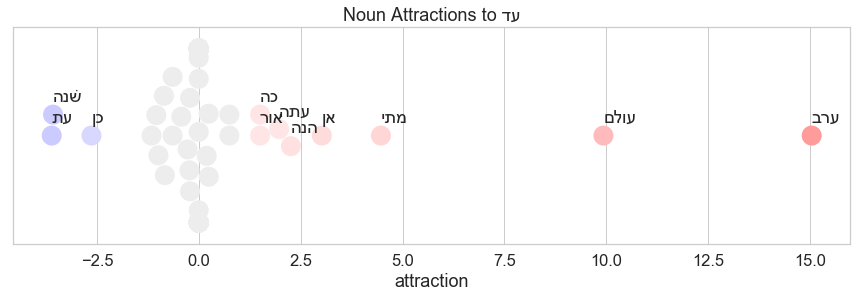

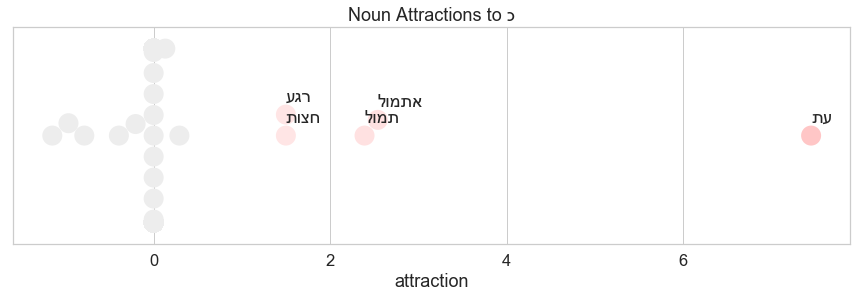

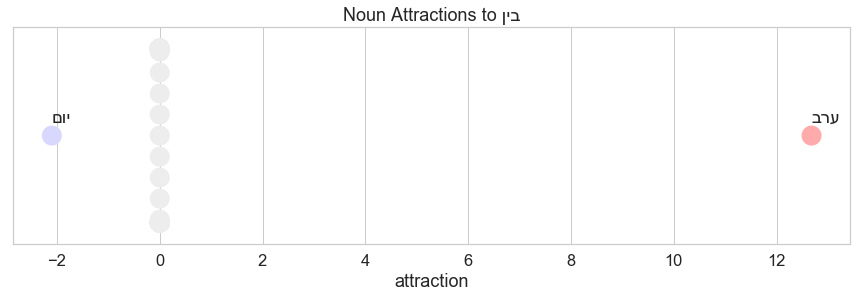

In [23]:
# values for uniform hue assignment:
maxattraction = float(pp_noun_associations.max().max())
minattraction = float(pp_noun_associations.min().min())
pvalue = 1.3

for prep in pp_noun_associations.columns:
    
    colexs = pp_noun_associations[prep].sort_values()    
    colex_data, colors = assign_hue(colexs.values, p=pvalue, maxvalue=maxattraction, minvalue=minattraction)
    
    # plot the figures
    plt.figure(figsize=(15, 4))
    dummyY = ['']*colexs.shape[0] # needed due to bug with Y & hue
    ax = sns.swarmplot(x=colex_data['value'], y=dummyY, hue=colex_data['color'], size=20, palette=colors)
    ax.legend_.remove()
        
    offsetX, offsetY = np.array(ax.collections[0].get_offsets()).T
    
    plt.xlabel('attraction')
    plt.title(f'Noun Attractions to {reverse_hb(prep)}')
    
    for i, prep in enumerate(colexs.index):  
        annotateX = offsetX[i]
        annotateY = offsetY[i] - 0.06
        prep_text = reverse_hb(prep)
        if colexs[prep] > pvalue:
            ax.annotate(prep_text, (annotateX, annotateY), size=18)
        elif colexs[prep] < -pvalue:
            ax.annotate(prep_text, (annotateX, annotateY), size=18)

## Analysis of NP Time Phrase Components

The primary component of a noun phrase (NP) is expected to be a nominal element, which may include words that have other primary parts of speech. In the ETCBC data, the feature `pdp` tells a word's part of speech based on its phrase-dependent function, while `sp` describes a words "default" part of speech category. But let's have a look at what elements in specific are found in the corpus's NP time phrases. We should expect to find primarily `sp` features of `subs` ("substantive").

  0.78s 682 results


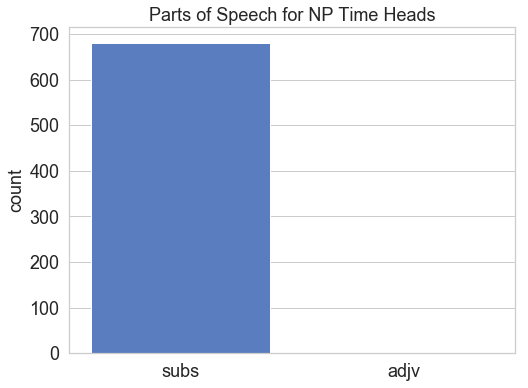

,count
subs,681
adjv,1


In [24]:
'''
Make a count of NP head word sp features.
'''

np_time = A.search('''

corpus
    phrase function=Time typ=NP
        <head- word

''', sets=sets)

np_time_heads = collections.Counter(F.sp.v(res[2]) for res in np_time)
np_time_heads = barplot_counts(np_time_heads, 'Parts of Speech for NP Time Heads')
np_time_heads

This is exactly what's expected. Let's have a look at the identity of the sole adjective head.

In [25]:
A.show([res for res in np_time if F.sp.v(res[2]) == 'adjv'], condenseType='clause')



**book** *1*



This is a use of the ordinal number "seventh" as a substantive.

### Counting and Measuring Subphrase Relations Within NP Phrases 

In this part, we dive deeper into NP time phrases by counting the kinds of relations that are connected to NP head words. In the ETCBC database, these relations are stored as "subphrase relations" with edges between various "parts" of a subphrase. Unfortunately, subphrase relations in the BHSA are unreliable and require more work to be used in this research. In order to grab reliable data on heads and their modifiers, I will use the series of search templates below. For each head the template queries a series of environments. The result is that a given relation is counted.

The templates are placed in a dictionary with associated metadata, and the dictionaries are appended to the `np_contexts` list to be run at the end of the cell. What is counted is the `rela` as contained in the template metadata.

In [26]:
np_contexts = []

np_rec = '''

corpus
    p:phrase function=Time typ=NP
        phrase_atom typ=NP
            head:word
            <mother- subphrase rela=rec
            /without/
                word sem_set=quant
            /-/

p <head- head
'''
np_contexts.append({'template':np_rec, 'headi':3, 'phrasei':1, 'name':'np_rec', 'rela':'rec'})

np_def = '''

corpus
    p:phrase function=Time typ=NP
        word pdp=art
        <: head:word

p <head- head
'''
np_contexts.append({'template':np_def, 'headi': 3, 'phrasei':1, 'name':'np_def', 'rela':'def'})

np_quant = '''

corpus
    p:phrase function=Time typ=NP
        phrase_atom typ=NP
            head:word
            word sem_set=quant
    
p <head- head
'''
np_contexts.append({'template':np_quant, 'headi':3, 'phrasei':1, 'name':'np_quant', 'rela':'quant'})

np_rela = '''

corpus
    p:phrase function=Time typ=NP
        s1:subphrase
            head:word
        s2:subphrase
        /without/
            word sem_set=quant
        /-/
        
p <head- head
s1 <mother- s2
'''
np_contexts.append({'template':np_rela, 'headi':3, 'phrasei':1, 'name':'np_rela', 'relai':4})

np_rela_pa = '''

corpus
    p:phrase function=Time typ=NP
        pa1:phrase_atom typ=NP
            head:word
        pa2:phrase_atom
        
p <head- head
pa1 <mother- pa2
'''
np_contexts.append({'template':np_rela_pa, 'headi':3, 'phrasei':1, 'name':'np_rela', 'relai':4})


# run the queries 
np_phrase2head2con = collections.defaultdict(lambda:collections.defaultdict(list))
for con in np_contexts:
    print(f'running {con["name"]}...')
    results = A.search(con['template'], sets=sets, silent=True)
    print(f'\t{len(results)} contexts found...')
    for res in results:
          phrase = res[con['phrasei']]
          head = res[con['headi']]
          rela = con.get('rela', 0) or F.rela.v(res[con['relai']])
          np_phrase2head2con[phrase][head].append(rela)
          
print(f'done with {len(np_phrase2head2con)} contexts recorded!')

running np_rec...
	39 contexts found...
running np_def...
	275 contexts found...
running np_quant...
	571 contexts found...
running np_rela...
	75 contexts found...
running np_rela...
	15 contexts found...
done with 618 contexts recorded!


This leaves several time phrases without relations:

In [30]:
no_rela_np = [res for res in np_time if res[1] not in np_phrase2head2con] # time phrases with no relations

len(no_rela_np)

14

Below is a quick sanity check to make sure no relations are missing.

In [31]:
not_found = [res for res in no_rela_np if len(L.d(res[1],'word')) > 1]
A.show(not_found, condenseType='phrase')

The results pass the sanity check, therefore we assign a `ø` rela to these remaining phrases.

In [32]:
for res in no_rela_np:
    phrase = res[1]
    head = E.head.t(phrase)[0]    
    np_phrase2head2con[phrase][head].append('ø')
print(f'done with {len(np_phrase2head2con)} contexts recorded!')

done with 632 contexts recorded!


The remaining contexts are parallel relations, which are only counted once for the main head item:

In [45]:
accounted_heads = set(head for phrase, heads in np_phrase2head2con.items() for head in heads)
other_heads = [(res[0], res[2]) for res in np_time if res[2] not in accounted_heads]

A.show(other_heads, condenseType='phrase', withNodes=True, end=5)
print('\t\tadditional results cut off at 5...\n')



**book** *1*





**book** *2*





**book** *3*





**book** *4*





**book** *5*



		additional results cut off at 5...



Thus we have no accounted for all of the NP time phrases. 

Now we make counts on the kinds of contexts we've found in general.

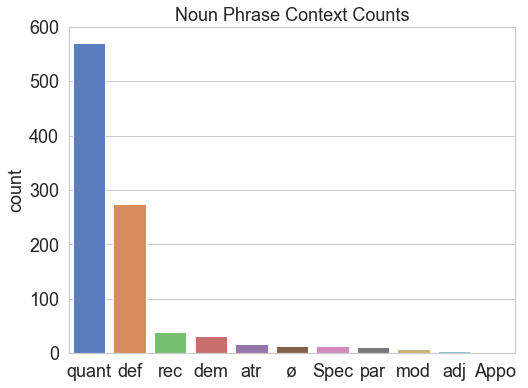

,count
quant,571
def,275
rec,39
dem,32
atr,18
ø,14
Spec,13
par,12
mod,8
adj,5


In [47]:
np_con_counts = collections.Counter()

for phrase, heads in np_phrase2head2con.items():
    for head, context in heads.items():
        np_con_counts.update(context)
        
np_con_counts = barplot_counts(np_con_counts, 'Noun Phrase Context Counts')
np_con_counts

Test for dependency between the relations...

In [48]:
co_relas = collections.defaultdict(lambda:collections.Counter())

for phrase, heads in np_phrase2head2con.items():
    for head, context in heads.items():
        for rela in context:
            this_context = [rel for rel in context]
            this_context.remove(rela)
            co_relas[rela].update(this_context)

In [49]:
co_relas = pd.DataFrame(co_relas).fillna(0)
co_rela_fish = apply_fishers(co_relas)
del co_rela_fish['ø']

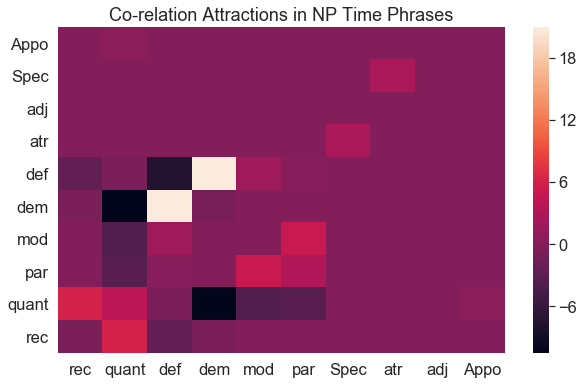

In [50]:
plt.figure(figsize=(10, 6))
plt.title('Co-relation Attractions in NP Time Phrases')
sns.heatmap(co_rela_fish)
plt.show()

**TODO: change the labels to understandable categories**

The strongest attractions are seen between definiteness and the demonstrative, showing that these two relations are strongly predictive for one another. Quantification and the nomen rectum relations also share a good degree of attraction. Quantification is predictive for other quantification, which is not surprising given that cardinal numbers will occur in parallel to one another.

Quantification and the demonstrative repulse each other quite strongly. Repulsion can be seen between the definiteness with itself, which is not noteworthy since definiteness never occurs twice on a single head element.

The modification and parallel (conjunction) relations show some attraction for one another. It is interesting that the modifying elements of `Spec` (specification) and `atr` (attribution) show slight predictability for one another.

<br>
<br>
<hr>

## Analysis of General Time Phrase Components

#### Measuring the Exclusivity of Head Lexemes in Time Phrases

Despite there being 1180 prepositional time phrases alone in the Hebrew Bible, the search for attraction found a mere 72 words serving as head of the governed noun phrases. This count is printed below (it is the number of colexemes gathered for the co-occurrence data):

In [59]:
pp_noun_associations.shape

(73, 7)

Haspelmath observes the prevalence throughout world languages of specialized nouns that refer to durations or points of time (e.g. 1997:27). A protypical example is what he calls "canonical time periods" referring to terms such as "day", "year", "month", etc. It is conceivable that these words are rather exclusive or preferential to time-function phrases, as opposed to other functions. If so, this is an important formal marker that sets these words apart from other terms, and is thus an important distinguishing marker for time phrases in general, i.e. as phrases which would prefer a rather exclusive set of specialized terms whose meaning refers to positions or durations of time. 

Below I make a query for all phrases with various functions and provide a co-occurrence count for their head nouns. Specifically, we want to measure attractional strength of various nouns/adverbs to particular functions, which in turn will allow us to define how exclusive time phrase nouns/adverbs are. 

In [61]:
corpus_function_query = '''

corpus
    phrase function#PtcO|PreS|PreO
        <nhead- word pdp#prep ls#card|ppre
'''

corpus_functions = A.search(corpus_function_query, sets={'corpus': corpus})

funct_maps = {'PreO': 'Pred', 'PreS': 'Pred', 'PtcO': 'Pred',
              'IntS': 'Intj', 'NCoS': 'NCop','ModS': 'Modi',
              'ExsS': 'Exst'}

# make the counts
corpusfuncts = collections.defaultdict(lambda: collections.Counter())
for book, phrase, head_word in corpus_functions:
    function = funct_maps.get(F.function.v(phrase), F.function.v(phrase))
    head_lex = F.lex.v(head_word)
    corpusfuncts[function][head_lex] += 1
corpusfuncts = pd.DataFrame(corpusfuncts).fillna(0)

corpfuncts = apply_fishers(corpusfuncts)

print(corpfuncts.shape)
corpfuncts.head()

  1.86s 117087 results


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10


(4399, 21)


,Time,Pred,Subj,Objc,Conj,PreC,Cmpl,Rela,Modi,Adju,...,Intj,Frnt,Nega,PrcS,Ques,Voct,NCop,PrAd,Exst,EPPr
<B/,0.000000,-0.460093,1.440781,0.346183,-0.448118,0.000000,0.313623,0.000000,0.000000,0.817337,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
<B=/,0.000000,0.000000,0.867713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
<BD/,-2.955510,-45.946828,42.716287,1.449197,-38.509318,7.950668,15.789189,-4.792826,-1.924256,0.369087,...,-0.887141,0.519621,-3.282152,0.0,-0.366947,-0.199944,0.0,0.436529,0.0,0.0
<BDH/,-0.200376,-6.681658,-0.469151,9.840647,-5.672367,0.975550,0.409200,-0.370310,0.000000,9.418393,...,0.000000,0.000000,-0.195225,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
<BDH=/,0.000000,0.000000,0.867713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


There are some zero p-values in the dataset, indicating maximum levels of association (either positive or negative). This is probably because many lexemes only occur exclusively with a given function. Below those lexemes are displayed by gathering values equal to infinity (that is the result of `log10(0)`). Below can be seen examples such as several verbs that (naturally) occur only in `Pred` (predicate) function phrases. 

In [64]:
infs = corpfuncts[(corpfuncts == np.inf).any(1)]

print(infs.shape)
infs

(25, 21)


,Time,Pred,Subj,Objc,Conj,PreC,Cmpl,Rela,Modi,Adju,...,Intj,Frnt,Nega,PrcS,Ques,Voct,NCop,PrAd,Exst,EPPr
<FH[,-11.942783,inf,-90.522727,-63.535624,-148.148536,-2.380013,-62.974692,-19.547640,-5.217555,-17.340803,...,-4.574095,-3.600058,-13.428086,0.0,-2.583646,-1.432313,-1.090917,-0.370571,0.000000,0.000000
<TH,inf,-29.385855,-15.343043,-10.360824,-24.543646,-7.020205,-10.052332,-2.951096,21.027978,-2.619652,...,-0.564594,-0.384810,-1.919756,0.0,-0.197903,0.000000,0.000000,0.000000,0.000000,0.000000
<WD/,-0.107661,-21.852215,-11.329668,-7.526846,-18.048757,-5.132119,-8.516600,-2.114709,inf,-1.959157,...,-0.184207,-0.198719,-1.437495,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
>CR,-28.823812,-inf,-223.073776,-152.717455,-23.792824,-104.311848,-169.464225,inf,-20.353386,-41.808377,...,-11.461975,-8.968847,-32.755028,0.0,-6.829526,-3.626024,-2.784992,-1.415742,-0.574299,0.000000
>JN/,-1.762266,-30.436800,-15.675402,-10.728295,-25.343477,-7.177526,-11.873099,-3.143370,-1.262825,-2.804281,...,-0.562138,-0.383284,3.893861,0.0,-0.196841,0.000000,inf,0.000000,0.000000,0.000000
>L=,-1.608025,-26.765113,-13.881361,-9.502109,-22.168863,-6.331949,-10.463806,-2.601684,-1.091569,-2.257000,...,-0.371164,-0.187302,inf,0.0,-0.199916,0.000000,0.000000,0.000000,0.000000,0.000000
>M,-3.590517,-57.641448,-30.139854,-20.579223,inf,-14.067069,-22.897156,-6.147644,-2.611840,-5.479451,...,-1.232973,-0.893156,-4.087125,0.0,-0.537387,-0.193474,0.000000,0.000000,0.000000,0.000000
>MR[,-26.616346,inf,-205.591208,-140.637166,-inf,-70.520987,-156.172053,-43.553255,-13.454398,-38.545336,...,-10.644832,-8.307937,-30.185333,0.0,-6.108767,-3.270558,-2.632521,-1.447032,-0.379450,0.000000
BW>[,-9.736057,inf,-74.859685,-50.606193,-123.043195,1.829226,-58.718020,-16.181499,-3.872628,-11.611949,...,-3.742251,-2.928278,-11.083536,0.0,-2.077422,-1.082275,-0.725389,-0.386733,0.000000,0.000000
CNH/,inf,-44.527323,-6.757499,-9.122417,-37.098377,11.196872,-12.377409,-4.622896,-1.939192,-0.957849,...,-0.899870,-0.741237,-3.093824,0.0,-0.372020,0.000000,0.000000,0.447502,0.000000,0.000000


There are 23 colexemes that have maximally positive or negative associations between them and the target functions. Because it is impossible to plot infinite values, we substitute them with the maximum and minimum non-infinite values in the dataset.

In [65]:
noninfinites = corpfuncts[(corpfuncts != np.inf).all(1)]
ni_max = noninfinites.max().max()
ni_min = noninfinites.min().min()

print(f'max: {ni_max}')
print(f'min: {ni_min}')

max: 295.9837075471488
min: -177.80568301948787


Below we have a look at where these values come from.

In [66]:
noninfinites.max().sort_values(ascending=False).head()

Pred    295.983708
Subj    287.110980
Modi    264.638029
Ques    254.933495
Exst    220.398450
dtype: float64

In [67]:
noninfinites.min().sort_values().head()

Pred   -177.805683
Conj   -148.346355
Subj    -36.349546
Cmpl    -29.114466
Objc    -26.213918
dtype: float64

In [68]:
'''
Sanity check to make sure there are no longer any infinite values.
'''
corpfuncts_clean = corpfuncts.replace((np.inf, -np.inf), (ni_max, ni_min))
corpfuncts_clean[(corpfuncts_clean == np.inf).any(1)]

,Time,Pred,Subj,Objc,Conj,PreC,Cmpl,Rela,Modi,Adju,...,Intj,Frnt,Nega,PrcS,Ques,Voct,NCop,PrAd,Exst,EPPr


The values are now successfuly replaced.

In [69]:
functas = corpfuncts_clean # i.e. function associations

### Plot Number of Statistically Significant Colexemes per 100 Occurrences

In [81]:
function_to_significant = dict((funct, (functas[funct][functas[funct] > 1.3]).shape[0]) for funct in functas) # grab significant lexs
function_to_significant = pd.DataFrame.from_dict(function_to_significant, orient='index') # turn into df
function_to_significant = function_to_significant[(function_to_significant > 2).all(1)] # limit functions to at least more than 2 significant lexemes

We make a normalization for the number of attracted lexemes per 100 uses of each function in order to normalize the attracted lexeme counts. The normalization is adapted from the [helpful explanation of the](http://www.thegrammarlab.com/?p=160) grammar lab. I've adapted it by replacing "word counts" with "attracted lexeme counts" and "corpus size" with "frequency of function." The frequency of all functions is calculated by simply taking the sum of the co-occurrence function counts in `corpusfuncts`.

In [71]:
norm_fs = function_to_significant*100
norm_fs = norm_fs.div(corpusfuncts.sum(), axis='rows')
norm_fs = norm_fs.sort_values(by=0, ascending=False).dropna()

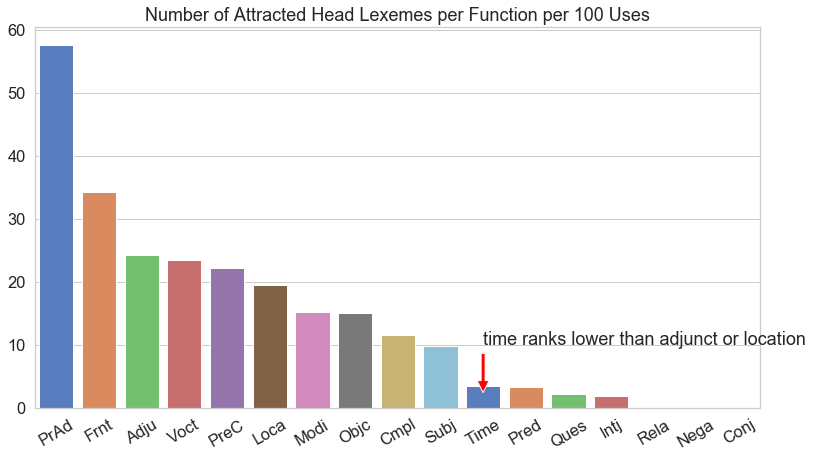

,0
PrAd,57.553957
Frnt,34.269663
Adju,24.150943
Voct,23.355263
PreC,22.215043
Loca,19.518717
Modi,15.164975
Objc,15.093492
Cmpl,11.471139
Subj,9.843809


In [98]:
plt.figure(figsize=(13, 7))
sns.barplot(data=norm_fs.transpose(), palette='muted')
plt.xticks(rotation=30)
plt.title('Number of Attracted Head Lexemes per Function per 100 Uses')
plt.annotate('time ranks lower than adjunct or location', xy=(10, 2), xytext=(10, 10), arrowprops=dict(facecolor='red', shrink=0.05), size=18)
plt.show()
display(norm_fs)

Time has fewer attracted lexemes per 100 occurrences than either location (`Loca`) or adjuncts (`Adju`). This shows that `Time` might be considered a more specialized function with a more limited range of lexemes. On the other hand, notice that the subject function is also near `Time`. This raises the question as to whether we can consider these differences as very significant or not.

### Plot Number of Different Lexemes per 100 Occurrences

Whereas in the first plot we looked at the number of attracted lexemes in relation to the number of function occurrences, in this plot we take a simpler approach, looking at the number of unique lexemes in relation to the number of function occurrences. Thus, in this approach, the lexemes that are counted may likewise occur in other roles. But this search shows the lexical diversity which can be expected within any given function in relation to its number of occurrences.

In [83]:
function_to_lexs = dict((funct, (corpusfuncts[corpusfuncts[funct] > 0]).shape[0]) for funct in corpusfuncts)
function_to_lexs = pd.DataFrame.from_dict(function_to_lexs, orient='index')
function_to_lexs = function_to_lexs[(function_to_lexs > 2).all(1)]

In [84]:
norm_fs = function_to_lexs*100
norm_fs = norm_fs.div(corpusfuncts.sum(), axis='rows')
norm_fs = norm_fs.sort_values(by=0, ascending=False).dropna()

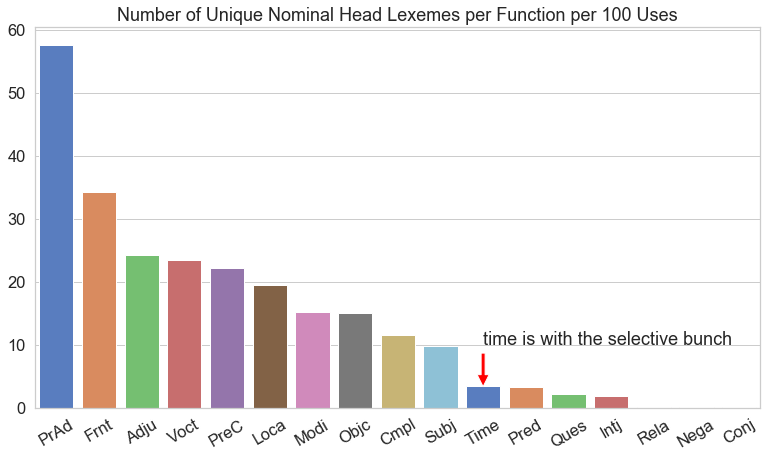

,0
PrAd,57.553957
Frnt,34.269663
Adju,24.150943
Voct,23.355263
PreC,22.215043
Loca,19.518717
Modi,15.164975
Objc,15.093492
Cmpl,11.471139
Subj,9.843809


In [96]:
plt.figure(figsize=(13, 7))
sns.barplot(data=norm_fs.transpose(), palette='muted')
plt.xticks(rotation=30)
plt.title('Number of Unique Nominal Head Lexemes per Function per 100 Uses')
plt.annotate('time is with the selective bunch', xy=(10, 3), xytext=(10, 10), arrowprops=dict(facecolor='red', shrink=0.05), size=18)
plt.show()
display(norm_fs)

In this chart, the `Time` function shows more separation from the other roles, being clearly more similar to `Pred`, `Ques`, `Intj`, `Rela`, `Nega`, and `Conj`. This confirms the intuition that `Time` prefers a more exclusive set of lexical heads than other adverbial functions. This result also allows us to interpret the close similarity of `Time` with `Subj` in the first method. It is likely due to the fact that certain words in both `Time` and `Subj` can occur in other functions, lessening their statistical associations with either function. When looked at from the perspective of the function itself, however, there is a clearer separation between the two. 

## Clause Level Time Phrase Associations

### Time Phrase and Predicate Associations

Do time phrases as a whole prefer certain verbal lexemes as compared with all other phrase functions? My hypothesis is that היה likely occurs with time phrases with a high frequency, perhaps even a statistically significant attractional strength. Perhaps this is not the case, or perhaps another verb lexeme has a high attraction with time phrases.

For this analysis, we restrict time phrases to those that occur within a verbal clause with the predicate. 

<br>
<br>
<hr>

## Locative Phrases as a Comparison Point

**TO FIX: In the search template as-is, only adjunctive (i.e. "optional") uses of location are identified. This omits very important cases where location is indicated, such as with movement verbs. In these contexts, the location phrase is marked as a "complement". In order to rectify this, some cases of movement verbs and their complements might be added to the search template**

Haspelmath's *From Space to Time* (1997) proposes that time phrases share a genetic relationship with locative phrases. The idea is that locative phrases, which indicate location in three dimensional space, are metaphorically related to the two-dimensional time line (Haspelmath 1997: 21-24). Haspelmath finds this pattern across 53 world languages.

Comparing the structure of location constructions provides a helpful comparison point for time constructions. As will be shown, these two functions prefer different phrase types. The opportunity to explore and explain these differences helps show what is distinctive about the time adverbial. It could potentially also shed light about the role of time adverbials as clause constituents, especially as it pertains to the verb and its satellites.

The ETCBC stores location-indicating phrases under the function of `Loca`. In the query below, we extract those phrases, in addition to their head words and those head words' lexemes.

In [ ]:
loca_phrases = '''
corpus
    p1:phrase function=Loca
        w1:word 
lex
   w2:word
   
p1 -heads> w1
w1 = w2
'''

print('Number of Location phrases in Gen-Kgs:')
locations = B.search(loca_phrases, sets={'corpus': corpus})
loca_counts = count_df(locations, 1, 'typ')
barplot_counts(loca_counts, 'Location Phrase Types in Gen-Kgs')
print('Location Phrase Type Counts in Gen-Kgs:')
loca_counts

In [ ]:
loca_preps = count_df([res for res in locations if F.typ.v(res[1]) == 'PP'], 4, 'lex_utf8')
barplot_counts(loca_preps, 'Location Prepositions in Gen-Kgs', reverse_labels=True, size=(10, 6))
print('Location Preposition Counts in Gen-Kgs:')
loca_preps

We see here that Loca PPs have much more lexical diversity than the Time PPs. 

Below we make further comparisons between the Time and Loca phrases.

In [ ]:
# compare location and time phrase types

loca_time = count_types.copy()
loca_time.columns = ['time']
loca_time = pd.concat([loca_time, loca_counts], axis=1, sort=True).fillna(0)
loca_time.columns = ['time', 'loca']
loca_time = loca_time

# normalize the counts
loca_time_norm = loca_time.apply(lambda column: column/column.sum()).sort_values(ascending=False, by='loca')

In [ ]:
# make side-by-side bar charts

width = 0.4
fig, ax = plt.subplots(figsize=(10, 6))   
bar_indices = np.arange(loca_time_norm.shape[0], step=1)
ax.bar(bar_indices, loca_time_norm['loca'], width, label='loca')
ax.bar(bar_indices+width, loca_time_norm['time'], width, label='time', color='pink')
ax.legend(fontsize=18)
ax.set_xticks(bar_indices+width/2)
ax.set_xticklabels(loca_time_norm.index, fontsize=18)
ax.set_ylabel('ratio', fontsize=18)
ax.set_title('Comparison of Time and Location Phrase Types', fontsize=18)
plt.show()
print('\nNormalized Ratios of Phrase Types for Time and Loca Function Phrases:')
loca_time_norm

In [ ]:
print('Raw Counts of Phrase Types for Time and Loca Function Phrases:')
loca_time

Note the difference between the `Time` and `Loca` noun phrases (`NP`):

In [ ]:
loca_time_norm['time']['NP'] - loca_time_norm['loca']['NP']

There is also a slight decrease in `Time`'s preference of a prepositional phrase (`PP`):

In [ ]:
loca_time_norm['time']['PP'] - loca_time_norm['loca']['PP']

Both `Loca` and `Time` are found often as prepositional phrases (`PP`). But `Time` is found as a simple noun phrase (`NP`) much more often (+0.24). This results in a lower ratio of prepositional phrases for `Time` (-0.25). Thus, the bare noun phrase appears to play a more important role in the `Time` function.

Surprisingly, `Time` and `Loca` share a fairly equal preference for the adverb phrase (`AdvP`) at 0.17 and 0.15, respectively. It is not surprising, on the other hand, that `Time` does not appear in a proper noun phrase `PrNP`, since time units do not generally have proper names (with the exception of something like seasons or festivals). 

#### Testing for Association Strengths

We have observed that there are higher levels of NP in `Time` function phrases than in `Loca` phrases. We have also seen a decrease in the ration of `NP` phrases used with `Time`. Are these differences statistically significant?

In [ ]:
loca_time_fish = collections.defaultdict(lambda: collections.defaultdict())

for funct_i in loca_time.columns:
    total_i = loca_time[funct_i].sum() # for req value
    
    for typ_j in loca_time.index:
        total_j = loca_time.loc[typ_j].sum() # for req value
        
        # get values for fisher's exact test and run the test
        a = loca_time[funct_i].loc[typ_j] # observed freq
        b = total_i - a
        c = total_j - a
        d = loca_time.sum().sum() - (a+b+c)
        contingency = np.matrix([[a, b], [c, d]])
        oddsratio, p_value = stats.fisher_exact(contingency)
        loca_time_fish[funct_i][typ_j] = round(p_value, 5)
        
loca_time_fish = pd.DataFrame(loca_time_fish)
loca_time_fish

Any value < 0.05 represents a statistically significant association between the two categories (more specifically, these are cases where there is <5% chance that the observed values are due to chance; the null hypothesis, which states that the observed value is not due to a categorical association, can be rejected on a value <0.05). Thus, we can see that the values for `NP` and `PP` are significantly associated with `Time` and `Loca`, with lower values for `NP` x `Time` and higher values for `PP` x `Time`. The proper noun phrase (`PrNP`) is also associated strongly, negatively so with `Time` and positively so with `Loca`. This makes sense, since most time phrases in the HB will not have a proper noun. The `AdvP`, as we observed with the ratios, is not associated with either `Time` or `Loca`, since these two categories have a nearly equal proportion of this phrase type.